In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras import layers,models

In [2]:
train_directory=r'E:\Desktop\Garbage classification\Train'

In [3]:
test_directory=r'E:\Desktop\Garbage classification\Test'

In [4]:
classes=['cardboard','glass','metal','paper','plastic','trash']

In [5]:
train_data=[]

for category in classes:
    folder=os.path.join(train_directory,category)
    label=classes.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        train_data.append([img_arr,label])

        
    

In [6]:
test_data=[]

for category in classes:
    folder=os.path.join(test_directory,category)
    label=classes.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        test_data.append([img_arr,label])

In [7]:
random.shuffle(train_data)

In [8]:
random.shuffle(test_data)

In [9]:
x_train=[]
y_train=[]

for features,labels in train_data:
    x_train.append(features)
    y_train.append(labels)

In [10]:
x_test=[]
y_test=[]

for features,labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [11]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [12]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [13]:
pickle.dump(x_train,open('x_train.pkl','wb'))
pickle.dump(y_train,open('y_train.pkl','wb'))

In [14]:
pickle.dump(x_test,open('x_test.pkl','wb'))
pickle.dump(y_test,open('y_test.pkl','wb'))

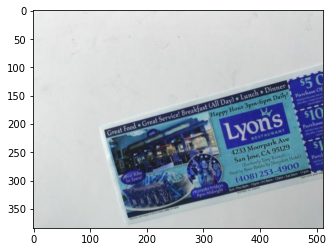

In [15]:
plt.imshow(x_train[0])

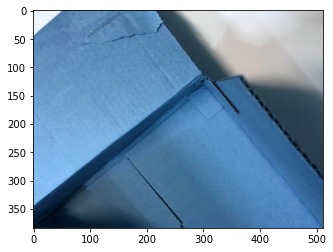

In [16]:
plt.imshow(x_test[0])

In [17]:
def plot_sample(X,Y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

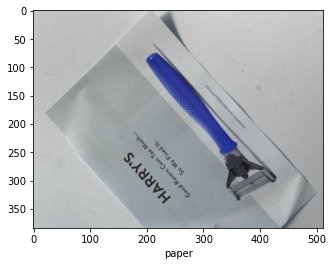

In [18]:
plot_sample(x_train,y_train,2)

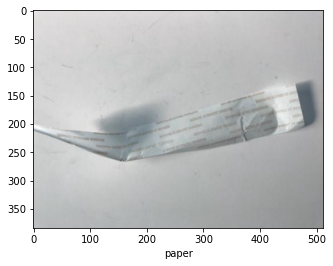

In [19]:
plot_sample(x_test,y_test,2)

In [20]:
#normalization
x_train=x_train/255
x_test=x_test/255

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(384, 512, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
76/76 [==============================] - 264s 3s/step - loss: 4.6708 - accuracy: 0.2962
Epoch 2/10
76/76 [==============================] - 282s 4s/step - loss: 1.2902 - accuracy: 0.5102
Epoch 3/10
76/76 [==============================] - 258s 3s/step - loss: 0.9524 - accuracy: 0.6531
Epoch 4/10
76/76 [==============================] - 250s 3s/step - loss: 0.5545 - accuracy: 0.8126
Epoch 5/10
76/76 [==============================] - 252s 3s/step - loss: 0.3140 - accuracy: 0.9078
Epoch 6/10
76/76 [==============================] - 250s 3s/step - loss: 0.2515 - accuracy: 0.9339
Epoch 7/10
76/76 [==============================] - 252s 3s/step - loss: 0.1315 - accuracy: 0.9639
Epoch 8/10
76/76 [==============================] - 253s 3s/step - loss: 0.1661 - accuracy: 0.9601
Epoch 9/10
76/76 [==============================] - 257s 3s/step - loss: 0.0829 - accuracy: 0.9751
Epoch 10/10
76/76 [==============================] - 261s 3s/step - loss: 0.0805 - accuracy: 0.9826


In [24]:
cnn.evaluate(x_test,y_test)

4/4 [==============================] - 2s 568ms/step - loss: 2.0774 - accuracy: 0.5476


[2.07736873626709, 0.5476190447807312]

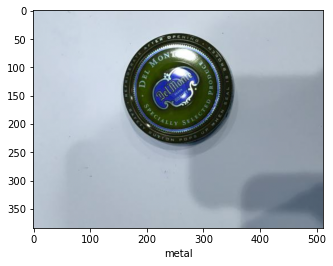

In [27]:
plot_sample(x_test, y_test,3)


In [28]:
y_pred=cnn.predict(x_test)
y_pred[:5]

array([[9.99478400e-01, 3.10939969e-04, 9.42745615e-08, 4.99883051e-08,
        1.89106300e-04, 2.15047785e-05],
       [9.99271572e-01, 6.52751510e-07, 6.56169083e-04, 5.50144659e-06,
        3.51000817e-05, 3.10649048e-05],
       [9.18544009e-02, 6.57802969e-02, 6.49509346e-03, 6.52352571e-01,
        7.19444826e-02, 1.11573204e-01],
       [1.42155222e-12, 4.31939516e-05, 9.99878287e-01, 2.27480484e-07,
        4.52319218e-05, 3.31497722e-05],
       [8.47174898e-02, 5.44038832e-01, 1.09926639e-02, 1.28432289e-01,
        1.81685343e-01, 5.01334034e-02]], dtype=float32)

In [31]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 3, 2, 1]

In [32]:
y_test[:5]

array([0, 0, 3, 2, 1])

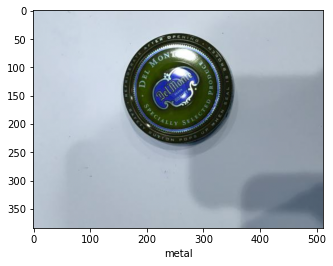

In [33]:
plot_sample(x_test, y_test,3) #actual value

In [34]:
classes[y_classes[3]] #predicted value

'metal'

In [37]:
from sklearn.metrics import classification_report
print('Classification report: \n',classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.37      0.55      0.44        20
           2       0.48      0.80      0.60        20
           3       0.52      0.50      0.51        22
           4       0.61      0.50      0.55        22
           5       1.00      0.27      0.43        22

    accuracy                           0.55       126
   macro avg       0.63      0.55      0.55       126
weighted avg       0.63      0.55      0.54       126



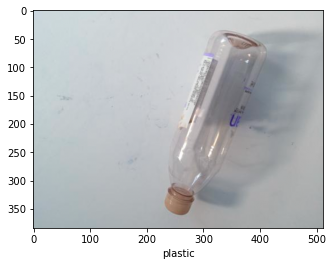

In [38]:
plot_sample(x_test, y_test,50) #actual value

In [40]:
classes[y_classes[50]] #predicted value

'plastic'